# Titanic Dataset Analysis
## A data science project by Porsche GTRR

#### We are the Porsche GTRR a team formed by Grosso Luca, Torterolo Francesco, Risso Beatrice e Robresco Simone

# Titanic Dataset Analysis Project

### Roles:
- **Graphics Designer**: Beatrice Risso  
- **Coders**: Simone Robresco, Francesco Torterolo  
- **Notebook Redactor**: Luca Grosso

## Project Structure

1. **Introduction**: Overview of the project goals and team roles.
2. **Dataset Description**: Summary of the Titanic dataset and its key features.
3. **Exploratory Data Analysis (EDA)**: High-level exploration of trends and patterns.
4. **Conclusions**: Insights derived from the analysis.

## Introduction

In this project, our team analyzed a dataset about the Titanic disaster to uncover relationships between different features of the dataset. Specifically, we investigated connections between:
- **Sex**
- **Age**
- **Class of cabin**
- **Number of siblings or spouses aboard**
- **Survived or not**

Simone Robresco and Francesco Torterolo developed the code for data analysis and visualization. Beatrice Risso designed the types of graphs used. Luca Grosso organized the notebook, created the GitHub repository,
and customized the project presentation.

## Dataset Description

The Titanic dataset provides information on the passengers aboard the Titanic, including:
- **Demographic details** (e.g., age, gender).
- **Travel-related information** (e.g., ticket class, number of relatives aboard).
- **Survival status** (indicating whether a passenger survived the disaster).

Understanding the data's structure and cleaning it is crucial before diving into the analysis.

## Exploratory Data Analysis (EDA)

### Goals of the Analysis

The main objective of this analysis is to understand the relationships between passenger attributes and survival rates. Key areas of focus include:
- Differences in survival rates by gender.
- The impact of age and class on survival.
- Family structure and its relation to survival probability.

### Visualizations to Consider

- **Bar Charts**: For categorical comparisons (e.g., survival by class or gender).
- **Histograms**: For understanding distributions (e.g., age distribution).
- **Heatmaps**: To showcase correlations between numeric variables.
- **Pie Charts**: For visualizing proportions (e.g., survival rates).

### Importazione delle librerie e Dichiarazione delle variabili

In [ ]:
!pip3 install -U scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Carica il dataset
file_path = './titanic.csv'
titanic_data = pd.read_csv(file_path) 

In [79]:
# Ignora i warning
warnings.filterwarnings("ignore")

# Configuriamo lo stile dei grafici per renderli più leggibili
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)  # Imposta la dimensione delle figure

In [95]:
# Stampiamo le dimensioni del dataset (numero di righe e colonne) e le informazioni generali
print("Dimensioni del dataset:", titanic_data.shape)  # Dimensioni del dataset

Dimensioni del dataset: (891, 2)


### Guardiamo la distribuzione dei dati per le varie features

In [81]:
# Generiamo statistiche descrittive (media, deviazione standard, min, max, ecc.) per tutte le variabili numeriche
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Box Plot che ci permette di capire l'età media dei passeggeri

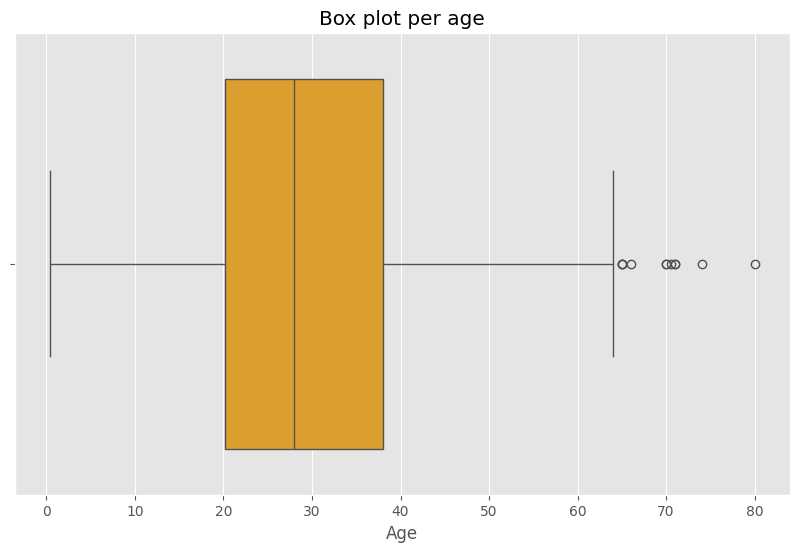

In [82]:
# Box plot per individuare possibili outliers

plt.figure()
sns.boxplot(x= titanic_data['Age'], color=(250/255, 166/255, 19/255))  # Box plot per la colonna attuale
plt.title(f"Box plot per {'age'}")  # Titolo per il grafico attuale
plt.show()

### Droppiamo le features che non ci interessano successivamente

In [83]:
def rgb_to_tuple(rgb_string):
    # Convertire "rgb(255, 0, 0)" in una tupla come (1.0, 0.0, 0.0)
    rgb = rgb_string.replace('rgb(', '').replace(')', '').split(',')
    return tuple(int(x) / 255 for x in rgb)

In [84]:
# Elenco delle colonne da eliminare
columns_to_drop = [
    'PassengerId', 'Name', 'Parch', 'Embarked',
    'Cabin', 'Fare', 'Ticket']

# Rimuovi le colonne non utilizzate
data_cleaned = titanic_data.drop(columns=columns_to_drop)

# Visualizza le colonne rimanenti
print("\nColonne rimanenti dopo la pulizia:")
print(data_cleaned.columns)


Colonne rimanenti dopo la pulizia:
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp'], dtype='object')


### Funzione che definisce i codice RGB per i colori dei grafici

In [85]:
# Definire i colori
brown = rgb_to_tuple('rgb(166, 60, 6)') 
red = rgb_to_tuple('rgb(244, 71, 8)')
yell = rgb_to_tuple('rgb(250, 166, 19)')
green = rgb_to_tuple('rgb(104, 142, 38)')
blue = rgb_to_tuple('rgb(21, 96, 100)')

### Filtriamo i dati per Genere e stato di sopravvivenza

In [86]:
# Filtrare i dati per genere e stato di sopravvivenza
women_counts = [
    titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Survived'] == 0)].shape[0],  # Donne morte
    titanic_data[(titanic_data['Sex'] == 'female') & (titanic_data['Survived'] == 1)].shape[0],  # Donne vive
]

men_counts = [
    titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Survived'] == 0)].shape[0],    # Uomini morti
    titanic_data[(titanic_data['Sex'] == 'male') & (titanic_data['Survived'] == 1)].shape[0],    # Uomini vivi
]

In [87]:
# Funzione per combinare etichette con percentuali
def make_labels(values, labels):
    total = sum(values)
    return [f"{label}\n({value / total:.1%})" for label, value in zip(labels, values)]

# Etichette con percentuali per donne
women_labels = make_labels(women_counts, ['Morte', 'Vive'])

# Etichette con percentuali per uomini
men_labels = make_labels(men_counts, ['Morti', 'Vivi'])

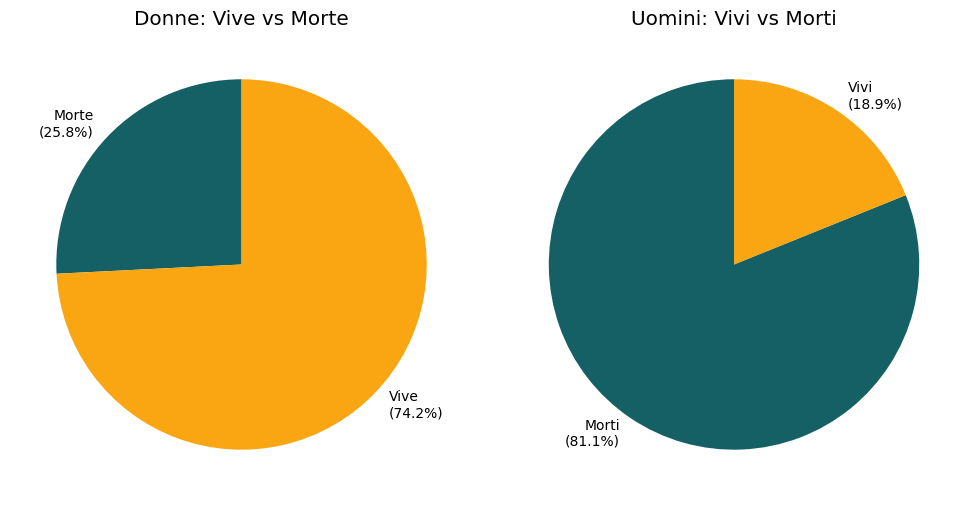

In [88]:
# Grafico a torta per le donne
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(women_counts, labels=women_labels, startangle=90, colors=[blue, yell])
plt.title('Donne: Vive vs Morte')

# Grafico a torta per gli uomini
plt.subplot(1, 2, 2)
plt.pie(men_counts, labels=men_labels, startangle=90, colors=[blue, yell])
plt.title('Uomini: Vivi vs Morti')

plt.tight_layout()
plt.show()

  Age Group  Number of Deaths
0       0-9                24
1     10-19                61
2     20-29               143
3     30-39                94
4     40-49                55
5     50-59                28
6     60-69                13
7     70-79                 6
8     80-89                 0
9     90-99                 0


<Axes: xlabel='Age Group'>

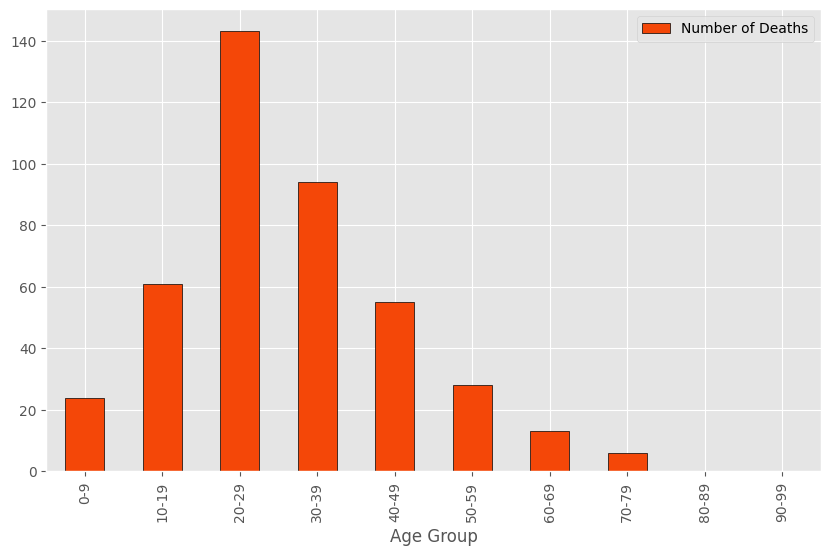

In [89]:
# Filtra solo le colonne necessarie e rimuovi i valori mancanti
titanic_data = titanic_data[['Age', 'Survived']].dropna()

# Converti 'Age' in numerico
titanic_data['Age'] = pd.to_numeric(titanic_data['Age'], errors='coerce')

# Definisci i bin di età e crea le fasce
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]
titanic_data['Age Group'] = pd.cut(titanic_data['Age'], bins=age_bins, labels=age_labels, right=False)

# Conta le morti (Survived == 0) per ogni fascia d'età
deaths_by_age_group = titanic_data[titanic_data['Survived'] == 0].groupby('Age Group').size()

# Visualizza il risultato come tabella
deaths_by_age_group = deaths_by_age_group.reset_index(name='Number of Deaths')
print(deaths_by_age_group)
deaths_by_age_group.plot(kind='bar', x='Age Group', y='Number of Deaths', color= red, edgecolor='black')

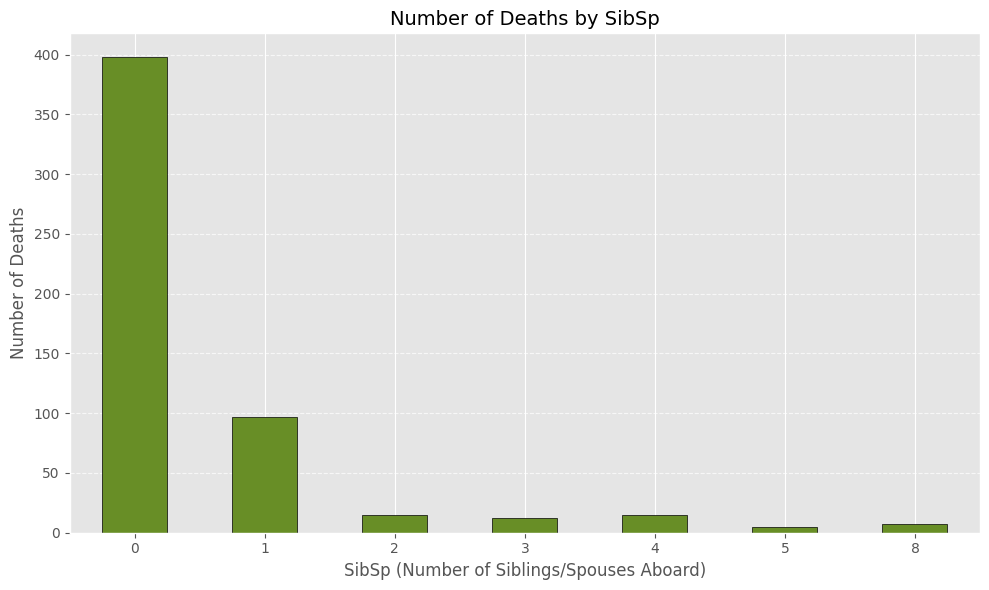

In [90]:

# Funzione per convertire rgb string in tuple normalizzata
def rgb_to_normalized_tuple(rgb_string):
    return tuple(int(value) / 255 for value in rgb_string.strip('rgb()').split(','))

# Definizione dei colori normalizzati
green = rgb_to_normalized_tuple('rgb(104, 142, 38)')

# Carica il dataset
file_path = './titanic.csv'
titanic_data = pd.read_csv(file_path)

# Filtra solo le colonne necessarie e rimuovi i valori mancanti
titanic_data = titanic_data[['SibSp', 'Survived']].dropna()

# Conta le morti (Survived == 0) per ciascun valore di SibSp
deaths_by_sibsp = titanic_data[titanic_data['Survived'] == 0].groupby('SibSp').size()

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
deaths_by_sibsp.plot(
    kind='bar',
    color=green,
    edgecolor='black'
)
plt.title('Number of Deaths by SibSp', fontsize=14)
plt.xlabel('SibSp (Number of Siblings/Spouses Aboard)', fontsize=12)
plt.ylabel('Number of Deaths', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


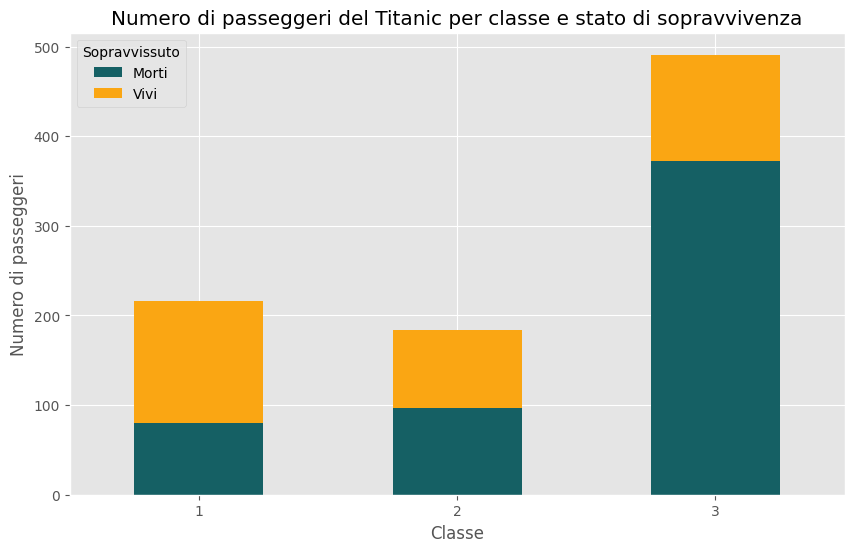

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

# Carica il file CSV
# Assicurati di avere il file 'titanic.csv' nella stessa directory del tuo script
df = pd.read_csv('./titanic.csv')

# Controlla le prime righe del DataFrame per assicurarti che i dati siano caricati correttamente
print(df.head())

# Crea una tabella di contingenza per contare i passeggeri in base a Pclass e Survived
contingency_table = pd.crosstab(df['Pclass'], df['Survived'], rownames=['Classe'], colnames=['Sopravvissuto'])

# Crea un istogramma con colori rosso e giallo in formato RGB
contingency_table.plot(kind='bar', stacked=True, color=[(21/255, 96/255, 100/255), (250/255, 166/255, 19/255)]) 

# Aggiungi etichette e titolo
plt.title('Numero di passeggeri del Titanic per classe e stato di sopravvivenza')
plt.xlabel('Classe')
plt.ylabel('Numero di passeggeri')
plt.xticks(rotation=0)  # Ruota le etichette dell'asse x per una migliore leggibilità
plt.legend(['Morti', 'Vivi'], title='Sopravvissuto')

# Mostra il grafico
plt.show()

## Conclusions

From our initial exploration, we expect to uncover:
- Higher survival rates for females compared to males.
- A strong correlation between passenger class and survival (e.g., first-class passengers having better chances).
- Trends in survival based on family structure and age.